# **Bellabeat: Google Capstone Project with Python**

# ****Introduction:****
Welcome to the Bellabeat data analysis case study! Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. **Urška Sršen, cofounder and Chief Creative Officer of Bellabeat**, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of
Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company.

# **About The Company**
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women. 

By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website. The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. 
Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and
consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.

Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.

# Business Task
**Identify trends and behaviour patterns in smart device usage among non-Bellabeat users and apply insights to one Bellabeat product.**

# Data Preparation

**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Import Datasets**

In [2]:
daily_activity = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')
sleep = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv')
hourly_intensities = pd.read_csv('../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv')

In [3]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [5]:
hourly_intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,4/12/2016 12:00:00 AM,20,0.333333
1,1503960366,4/12/2016 1:00:00 AM,8,0.133333
2,1503960366,4/12/2016 2:00:00 AM,7,0.116667
3,1503960366,4/12/2016 3:00:00 AM,0,0.000000
4,1503960366,4/12/2016 4:00:00 AM,0,0.000000


In [6]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

The type of 'ActivitydDate' column is a string in this dataframe. We need to convert it to datetime.

In [7]:
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], dayfirst = True)

In [8]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [9]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [10]:
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'], dayfirst=True)

In [11]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [12]:
hourly_intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [13]:
hourly_intensities['ActivityHour'] = pd.to_datetime(hourly_intensities['ActivityHour'], dayfirst= True)

In [14]:
hourly_intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   TotalIntensity    22099 non-null  int64         
 3   AverageIntensity  22099 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 690.7 KB


# Data Processing

Checking for the duplicate values in our datasets. If any duplicated values found, we will remove them.

In [15]:
daily_activity[daily_activity.duplicated()]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


In [16]:
sleep[sleep.duplicated()]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
161,4388161847,2016-05-05,1,471,495
223,4702921684,2016-07-05,1,520,543
380,8378563200,2016-04-25,1,388,402


In [17]:
sleep = sleep.drop_duplicates()

In [18]:
sleep[sleep.duplicated()]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed


In [19]:
hourly_intensities[hourly_intensities.duplicated()]

,Id,ActivityHour,TotalIntensity,AverageIntensity


**Let's check out the number of participants in the datasets**

In [20]:
daily_activity['Id'].nunique()

33

In [21]:
sleep['Id'].nunique()

24

In [22]:
hourly_intensities['Id'].nunique()

33

There are 33 participants in the daily_activity, 24 in the sleep and 33 in the hourly_intensities  data set.

In [23]:
daily_activity.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,940.0,4.855407e+09,2.424805e+09,1.503960e+09,2.320127e+09,4.445115e+09,6.962181e+09,8.877689e+09
TotalSteps,940.0,7.637911e+03,5.087151e+03,0.000000e+00,3.789750e+03,7.405500e+03,1.072700e+04,3.601900e+04
TotalDistance,940.0,5.489702e+00,3.924606e+00,0.000000e+00,2.620000e+00,5.245000e+00,7.712500e+00,2.803000e+01
TrackerDistance,940.0,5.475351e+00,3.907276e+00,0.000000e+00,2.620000e+00,5.245000e+00,7.710000e+00,2.803000e+01
LoggedActivitiesDistance,940.0,1.081709e-01,6.198965e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.942142e+00
VeryActiveDistance,940.0,1.502681e+00,2.658941e+00,0.000000e+00,0.000000e+00,2.100000e-01,2.052500e+00,2.192000e+01
ModeratelyActiveDistance,940.0,5.675426e-01,8.835803e-01,0.000000e+00,0.000000e+00,2.400000e-01,8.000000e-01,6.480000e+00
LightActiveDistance,940.0,3.340819e+00,2.040655e+00,0.000000e+00,1.945000e+00,3.365000e+00,4.782500e+00,1.071000e+01
SedentaryActiveDistance,940.0,1.606383e-03,7.346176e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e-01
VeryActiveMinutes,940.0,2.116489e+01,3.284480e+01,0.000000e+00,0.000000e+00,4.000000e+00,3.200000e+01,2.100000e+02


**According to the above summary, average 'Sedentary Minutes'are 991 minutes i.e. more than 16 hours which is pretty high.**

In [24]:
sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.100000e+02,410.000000,410.000000,410.000000
mean,4.994963e+09,1.119512,419.173171,458.482927
std,2.060863e+09,0.346636,118.635918,127.455140
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.750000
50%,4.702922e+09,1.000000,432.500000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


**Above summary shows that the average sleep is around 7 hours.**

In [25]:
hourly_intensities.describe()

,Id,TotalIntensity,AverageIntensity
count,2.209900e+04,22099.000000,22099.000000
mean,4.848235e+09,12.035341,0.200589
std,2.422500e+09,21.133110,0.352219
min,1.503960e+09,0.000000,0.000000
25%,2.320127e+09,0.000000,0.000000
50%,4.445115e+09,3.000000,0.050000
75%,6.962181e+09,16.000000,0.266667
max,8.877689e+09,180.000000,3.000000


Let's create a new column 'Total Hours' to convert total active minutes in to hours.

In [26]:
daily_activity['Total_Hours'] = (daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] + daily_activity['LightlyActiveMinutes'] + daily_activity['SedentaryMinutes']) / 60

In [27]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total_Hours
0,1503960366,2016-12-04,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,18.233333
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,17.216667
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,24.000000
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,16.633333
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,17.333333


Now, we will create a new 'WeekDay' column to understand the activity happening on the each day of the week.

In [28]:
daily_activity['Weekday'] = daily_activity.ActivityDate.apply(lambda x: x.day_name())

In [29]:
daily_activity['Weekday']

0         Sunday
1      Wednesday
2       Thursday
3         Friday
4       Saturday
         ...    
935       Friday
936       Monday
937    Wednesday
938     Saturday
939       Monday
Name: Weekday, Length: 940, dtype: object

In [30]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Total_Hours,Weekday
0,1503960366,2016-12-04,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,18.233333,Sunday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,17.216667,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,24.000000,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,16.633333,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,17.333333,Saturday


We will replicate the same process for 'Sleep' Dataset.

In [31]:
sleep['Total_Hours_Asleep'] = sleep['TotalMinutesAsleep'] / 60

In [32]:
sleep['WeekDay'] = sleep.SleepDay.apply(lambda x: x.day_name())

In [33]:
sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Total_Hours_Asleep,WeekDay
0,1503960366,2016-12-04,1,327,346,5.450000,Sunday
1,1503960366,2016-04-13,2,384,407,6.400000,Wednesday
2,1503960366,2016-04-15,1,412,442,6.866667,Friday
3,1503960366,2016-04-16,2,340,367,5.666667,Saturday
4,1503960366,2016-04-17,1,700,712,11.666667,Sunday


In [34]:
hourly_intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,2016-12-04 00:00:00,20,0.333333
1,1503960366,2016-12-04 01:00:00,8,0.133333
2,1503960366,2016-12-04 02:00:00,7,0.116667
3,1503960366,2016-12-04 03:00:00,0,0.000000
4,1503960366,2016-12-04 04:00:00,0,0.000000


In [35]:
hourly_intensities['HouroftheDay'] = hourly_intensities.ActivityHour.apply(lambda x: x.hour)

In [36]:
hourly_intensities.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,HouroftheDay
0,1503960366,2016-12-04 00:00:00,20,0.333333,0
1,1503960366,2016-12-04 01:00:00,8,0.133333,1
2,1503960366,2016-12-04 02:00:00,7,0.116667,2
3,1503960366,2016-12-04 03:00:00,0,0.000000,3
4,1503960366,2016-12-04 04:00:00,0,0.000000,4


# Data Analysis & Visualization

In [37]:
daily_activity.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
Total_Hours                 0
Weekday                     0
dtype: int64

In [38]:
sleep.isna().sum()

Id                    0
SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
Total_Hours_Asleep    0
WeekDay               0
dtype: int64

In [39]:
hourly_intensities.isna().sum()

Id                  0
ActivityHour        0
TotalIntensity      0
AverageIntensity    0
HouroftheDay        0
dtype: int64

<AxesSubplot:xlabel='Calories', ylabel='TotalSteps'>

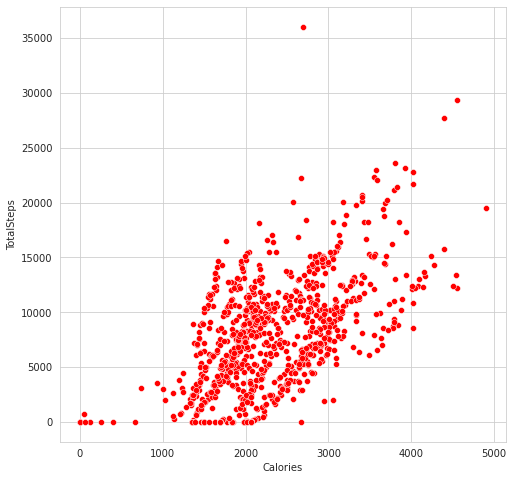

In [40]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 8))
sns.scatterplot(x='Calories', y='TotalSteps', data=daily_activity, color='red')

**We can observe the correlation in the plot of 'TotalSteps' and 'Calories' data. This means the higher the total steps, the more calories are burned.**

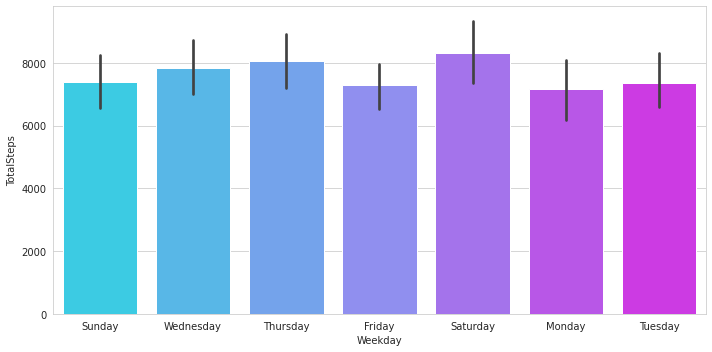

In [41]:
plt.figure(figsize = (10, 5))
sns.barplot(x='Weekday', y='TotalSteps', data=daily_activity, palette='cool')
plt.tight_layout()

**The number of 'TotalSteps' taken are highest on the Saturday. This means the audience is more active on the weekends.**

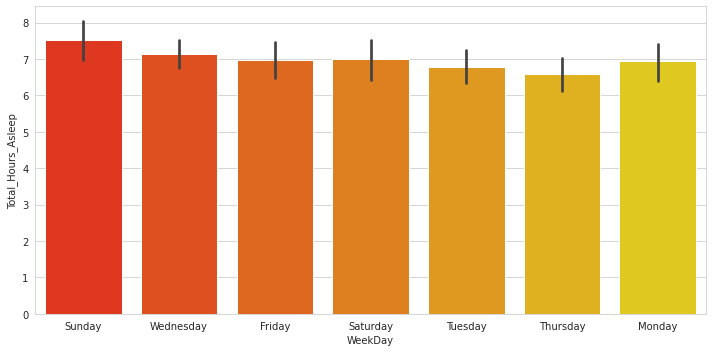

In [42]:
plt.figure(figsize = (10, 5))
sns.barplot(x='WeekDay', y='Total_Hours_Asleep', data=sleep, palette='autumn')
plt.tight_layout()

**As expected, the 'Sleep Hours' are higher on Sunday than the weekdays.**

<AxesSubplot:xlabel='TotalMinutesAsleep', ylabel='TotalTimeInBed'>

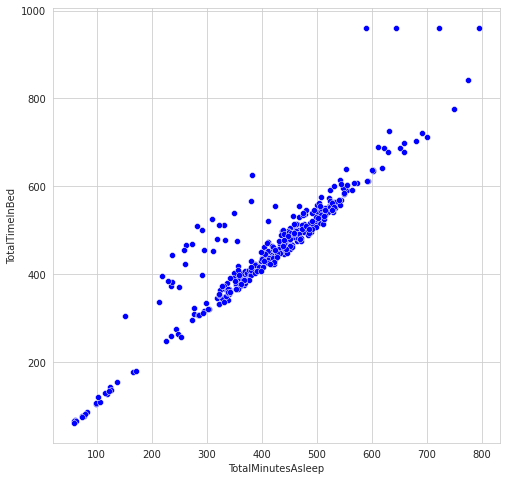

In [43]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x='TotalMinutesAsleep', y='TotalTimeInBed', data=sleep,color='blue')

**'TotalTimeInBed' and 'TotalMinutesAsleep' data points showcase a straight line indicating users are spending time in bed for sleeping.**

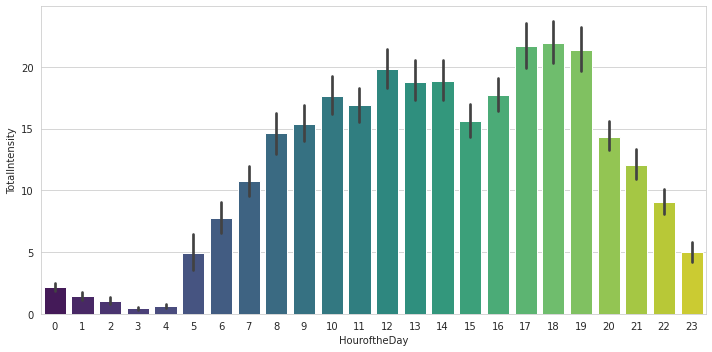

In [44]:
plt.figure(figsize = (10, 5))
sns.barplot(x='HouroftheDay', y='TotalIntensity', data=hourly_intensities, palette='viridis')
plt.tight_layout()

**The evening hours starting from 5 to 7 are the most intense hours for our users. This timing may be utilised by the participants for Gym and Fitness related activities.**

# Insights

**Way Forward for Bellabeat:**

* The Bellabeat App is designed to empower women and make them more aware about their fitness and health by installing good habits.

* According to CDC, minimum 8,000 daily steps takesn are associated with 51% less risk for all-cause mortality. The Bellabeat app will set the target of daily steps to be completed and inform the user time to time about its progress. 

* We have observed that a particular day has higher number of steps compared to others. This can be equalised with daily step target,

* To ensure women have complete sleep, the app can set an alarm reminding her about the sleeping hours. This can put sleeping schedule to the normal.

* Evening hours are most active hours according to the data. The app can schedule the fitness routine before the start of the day to help the user ease into their task.

* Reward points, fitness ratings, coupons can be introduced by the App to make the app more popular among its users.